In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Boxplots

In [7]:
df = pd.read_csv("../summary/opti_keywords_results.csv")

In [8]:
df.head()

,Unnamed: 0,name,save_logs,save_predictions,save_models,zip_models,verbatim,permutation,repetition,learning_rate,...,Rand-Index_Train,Mutual Information_Train,Variation of Information_Train,Rand-Index_Val,Mutual Information_Val,Variation of Information_Val,Rand-Index_Test,Mutual Information_Test,Variation of Information_Test,radius
0,0,opti_keywords-412,True,True,True,True,False,7,3,0.01,...,0.937219,0.922377,0.280089,0.782372,0.735074,0.894840,0.686100,0.656840,1.252308,NaN
1,1,opti_keywords-145,True,True,True,True,False,3,4,0.01,...,0.973638,0.965471,0.119313,0.612998,0.668336,0.937913,0.613959,0.586844,1.495417,NaN
2,2,opti_keywords-251,True,True,True,True,False,5,4,0.01,...,0.978911,0.979493,0.064940,0.362699,0.401923,1.311831,0.380319,0.454291,1.868364,2.0
3,3,opti_keywords-305,True,True,True,True,False,6,2,0.01,...,0.717688,0.784677,0.659232,0.385230,0.495564,1.107448,0.322474,0.398449,1.984969,2.0
4,4,opti_keywords-377,True,True,True,True,False,7,1,0.01,...,0.949302,0.948891,0.170159,0.629694,0.608746,1.069178,0.512488,0.538689,1.625480,2.0


In [9]:
df.columns

Index(['Unnamed: 0', 'name', 'save_logs', 'save_predictions', 'save_models',
       'zip_models', 'verbatim', 'permutation', 'repetition', 'learning_rate',
       'weight_decay', 'net', 'feature', 'skip', 'datetime',
       'split_percentage_train', 'split_percentage_val',
       'split_percentage_test', 'loss_function_type', 'loss_function_nclasses',
       'early_stopping_min', 'early_stopping_wait', 'hidden_size',
       'hidden_layers', 'num_heads', 'dropout', 'batchnorm', 'residual',
       'in_feats', 'out_feats', 'Rand-Index_All ', 'Mutual Information_All ',
       'Variation of Information_All ', 'Rand-Index_Train',
       'Mutual Information_Train', 'Variation of Information_Train',
       'Rand-Index_Val', 'Mutual Information_Val',
       'Variation of Information_Val', 'Rand-Index_Test',
       'Mutual Information_Test', 'Variation of Information_Test', 'radius'],
      dtype='object')

In [10]:
df.describe()

,Unnamed: 0,permutation,repetition,learning_rate,weight_decay,split_percentage_train,split_percentage_val,split_percentage_test,early_stopping_min,early_stopping_wait,...,Rand-Index_Train,Mutual Information_Train,Variation of Information_Train,Rand-Index_Val,Mutual Information_Val,Variation of Information_Val,Rand-Index_Test,Mutual Information_Test,Variation of Information_Test,radius
count,600.000000,600.000000,600.000000,6.000000e+02,6.000000e+02,600.000000,600.000000,6.000000e+02,600.0,600.0,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,200.0
mean,299.500000,5.500000,3.000000,1.000000e-02,1.000000e-02,0.150000,0.037500,6.000000e-01,150.0,80.0,...,0.845412,0.846659,0.503481,0.553816,0.587208,1.174546,0.519187,0.525818,1.651609,2.0
std,173.349358,2.874678,1.415394,1.388937e-16,1.388937e-16,0.107328,0.026832,3.666793e-15,0.0,0.0,...,0.160240,0.149935,0.452471,0.135824,0.113814,0.280826,0.105144,0.084762,0.220126,0.0
min,0.000000,1.000000,1.000000,1.000000e-02,1.000000e-02,0.040000,0.010000,6.000000e-01,150.0,80.0,...,0.123219,0.151068,0.000000,0.091793,0.081448,0.230437,0.096763,0.153798,1.119342,2.0
25%,149.750000,3.000000,2.000000,1.000000e-02,1.000000e-02,0.070000,0.017500,6.000000e-01,150.0,80.0,...,0.769820,0.769053,0.120512,0.472043,0.521544,0.994445,0.461220,0.481483,1.491567,2.0
50%,299.500000,5.500000,3.000000,1.000000e-02,1.000000e-02,0.120000,0.030000,6.000000e-01,150.0,80.0,...,0.892446,0.889373,0.376879,0.584936,0.605022,1.160820,0.530895,0.536187,1.644721,2.0
75%,449.250000,8.000000,4.000000,1.000000e-02,1.000000e-02,0.200000,0.050000,6.000000e-01,150.0,80.0,...,0.971863,0.965456,0.787757,0.643498,0.665575,1.332707,0.591272,0.584979,1.806174,2.0
max,599.000000,10.000000,5.000000,1.000000e-02,1.000000e-02,0.320000,0.080000,6.000000e-01,150.0,80.0,...,1.000000,1.000000,2.120099,0.866932,0.891858,2.099734,0.732291,0.695447,2.219680,2.0


In [11]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.0
0.9.0


In [21]:
#df.groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Rand-Index_Test"].max().round(2)

In [20]:
df.groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Rand-Index_Test"].mean().round(2)

split_percentage_train  split_percentage_val  split_percentage_test  net         
0.04                    0.01                  0.6                    GAT_Net_fast    0.50
                                                                     GCN_Net         0.38
                                                                     LGNN_Net        0.39
0.08                    0.02                  0.6                    GAT_Net_fast    0.57
                                                                     GCN_Net         0.45
                                                                     LGNN_Net        0.48
0.16                    0.04                  0.6                    GAT_Net_fast    0.62
                                                                     GCN_Net         0.52
                                                                     LGNN_Net        0.52
0.32                    0.08                  0.6                    GAT_Net_fast    0.68
                  

In [22]:
df.groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Rand-Index_Test"].std().round(2)

split_percentage_train  split_percentage_val  split_percentage_test  net         
0.04                    0.01                  0.6                    GAT_Net_fast    0.04
                                                                     GCN_Net         0.09
                                                                     LGNN_Net        0.06
0.08                    0.02                  0.6                    GAT_Net_fast    0.03
                                                                     GCN_Net         0.09
                                                                     LGNN_Net        0.04
0.16                    0.04                  0.6                    GAT_Net_fast    0.02
                                                                     GCN_Net         0.08
                                                                     LGNN_Net        0.04
0.32                    0.08                  0.6                    GAT_Net_fast    0.02
                  

In [23]:
df.groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Mutual Information_Test"].mean().round(2)

split_percentage_train  split_percentage_val  split_percentage_test  net         
0.04                    0.01                  0.6                    GAT_Net_fast    0.51
                                                                     GCN_Net         0.40
                                                                     LGNN_Net        0.45
0.08                    0.02                  0.6                    GAT_Net_fast    0.56
                                                                     GCN_Net         0.46
                                                                     LGNN_Net        0.50
0.16                    0.04                  0.6                    GAT_Net_fast    0.60
                                                                     GCN_Net         0.52
                                                                     LGNN_Net        0.54
0.32                    0.08                  0.6                    GAT_Net_fast    0.65
                  

In [24]:
df.groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Mutual Information_Test"].std().round(2)

split_percentage_train  split_percentage_val  split_percentage_test  net         
0.04                    0.01                  0.6                    GAT_Net_fast    0.03
                                                                     GCN_Net         0.08
                                                                     LGNN_Net        0.04
0.08                    0.02                  0.6                    GAT_Net_fast    0.02
                                                                     GCN_Net         0.07
                                                                     LGNN_Net        0.03
0.16                    0.04                  0.6                    GAT_Net_fast    0.02
                                                                     GCN_Net         0.07
                                                                     LGNN_Net        0.02
0.32                    0.08                  0.6                    GAT_Net_fast    0.02
                  

In [25]:
df.groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].mean().round(2)

split_percentage_train  split_percentage_val  split_percentage_test  net         
0.04                    0.01                  0.6                    GAT_Net_fast    1.80
                                                                     GCN_Net         1.94
                                                                     LGNN_Net        1.90
0.08                    0.02                  0.6                    GAT_Net_fast    1.59
                                                                     GCN_Net         1.82
                                                                     LGNN_Net        1.75
0.16                    0.04                  0.6                    GAT_Net_fast    1.45
                                                                     GCN_Net         1.65
                                                                     LGNN_Net        1.61
0.32                    0.08                  0.6                    GAT_Net_fast    1.27
                  

In [41]:
df.groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].std().round(2)

split_percentage_train  split_percentage_val  split_percentage_test  net         
0.04                    0.01                  0.6                    GAT_Net_fast    0.10
                                                                     GCN_Net         0.13
                                                                     LGNN_Net        0.11
0.08                    0.02                  0.6                    GAT_Net_fast    0.07
                                                                     GCN_Net         0.14
                                                                     LGNN_Net        0.10
0.16                    0.04                  0.6                    GAT_Net_fast    0.08
                                                                     GCN_Net         0.15
                                                                     LGNN_Net        0.08
0.32                    0.08                  0.6                    GAT_Net_fast    0.06
                  

In [76]:
#Helper to print LaTeX tables
a = df.loc[df['net'] == "GCN_Net"].groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].mean().round(2)
b_std = df.loc[df['net'] == "GCN_Net"].groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].std().round(2)
s = ""
for x in a:
    s += "& " + str(x) + " $\\pm$ " + "{} "
s = s.format(list(b_std)[0],list(b_std)[1],list(b_std)[2],list(b_std)[3])
s += "\\" + "\\"
print(s)
#Helper to print LaTeX tables
a = df.loc[df['net'] == "GAT_Net_fast"].groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].mean().round(2)
b_std = df.loc[df['net'] == "GAT_Net_fast"].groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].std().round(2)
s = ""
for x in a:
    s += "& " + str(x) + " $\\pm$ " + "{} "
s = s.format(list(b_std)[0],list(b_std)[1],list(b_std)[2],list(b_std)[3])
s += "\\" + "\\"
print(s)
#Helper to print LaTeX tables
a = df.loc[df['net'] == "LGNN_Net"].groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].mean().round(2)
b_std = df.loc[df['net'] == "LGNN_Net"].groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].std().round(2)
s = ""
for x in a:
    s += "& " + str(x) + " $\\pm$ " + "{} "
s = s.format(list(b_std)[0],list(b_std)[1],list(b_std)[2],list(b_std)[3])
s += "\\" + "\\"
print(s)

& 1.94 $\pm$ 0.13 & 1.82 $\pm$ 0.14 & 1.65 $\pm$ 0.15 & 1.55 $\pm$ 0.19 \\
& 1.8 $\pm$ 0.1 & 1.59 $\pm$ 0.07 & 1.45 $\pm$ 0.08 & 1.27 $\pm$ 0.06 \\
& 1.9 $\pm$ 0.11 & 1.75 $\pm$ 0.1 & 1.61 $\pm$ 0.08 & 1.49 $\pm$ 0.07 \\


In [40]:
df.loc[df['net'] == "GAT_Net_fast"].groupby(["split_percentage_train","split_percentage_val","split_percentage_test","net"])["Variation of Information_Test"].mean().round(2)

split_percentage_train  split_percentage_val  split_percentage_test  net         
0.04                    0.01                  0.6                    GAT_Net_fast    1.80
0.08                    0.02                  0.6                    GAT_Net_fast    1.59
0.16                    0.04                  0.6                    GAT_Net_fast    1.45
0.32                    0.08                  0.6                    GAT_Net_fast    1.27
Name: Variation of Information_Test, dtype: float64

In [49]:
df = df.replace("GAT_Net_fast","GAT")
df = df.replace("LGNN_Net","LGNN")
df = df.replace("GCN_Net","GCN")

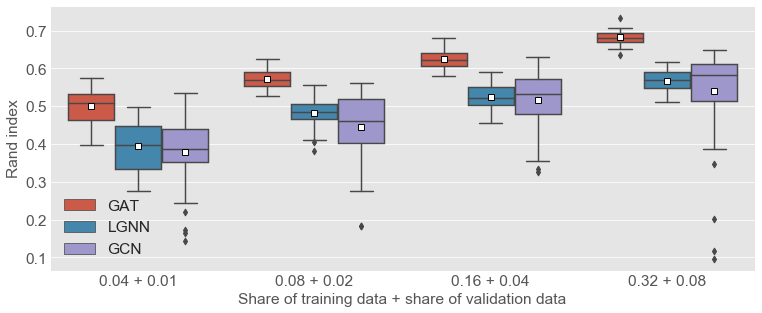

In [52]:
# Draw Plot
plt.figure(figsize=(13,5), dpi= 70)
plt.style.use('ggplot')
sns.boxplot(x='split_percentage_train', y='Rand-Index_Test', data=df, hue='net',showmeans=True,  meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
axes = plt.gca()
axes.set_xticklabels(["0.04 + 0.01","0.08 + 0.02","0.16 + 0.04","0.32 + 0.08"])
axes.set_xlabel("Share of training data + share of validation data", fontsize=16)
axes.set_ylabel("Rand index", fontsize=16)


# Decoration
#plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
leg = plt.legend()
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(axes.transAxes)

# Change to location of the legend. 
xOffset = 0
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = axes.transAxes)

plt.savefig('../summary/boxplots.pdf',bbox_inches="tight")
plt.show()

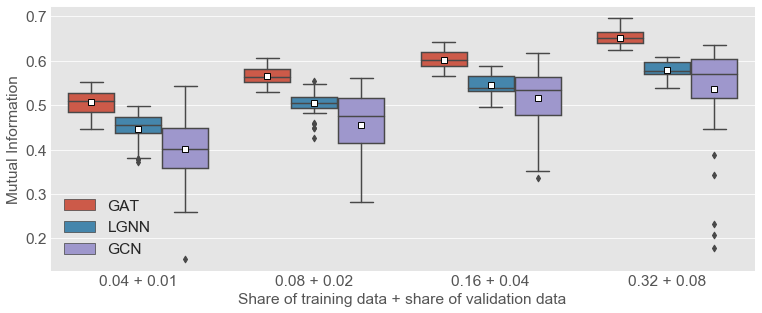

In [53]:
# Draw Plot
plt.figure(figsize=(13,5), dpi= 70)
plt.style.use('ggplot')
sns.boxplot(x='split_percentage_train', y='Mutual Information_Test', data=df, hue='net',showmeans=True,  meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
axes = plt.gca()
axes.set_xticklabels(["0.04 + 0.01","0.08 + 0.02","0.16 + 0.04","0.32 + 0.08"])
axes.set_xlabel("Share of training data + share of validation data", fontsize=16)
axes.set_ylabel("Mutual Information", fontsize=16)


# Decoration
#plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
leg = plt.legend()
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(axes.transAxes)

# Change to location of the legend. 
xOffset = 0
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = axes.transAxes)

plt.savefig('../summary/boxplots_mi.pdf',bbox_inches="tight")
plt.show()

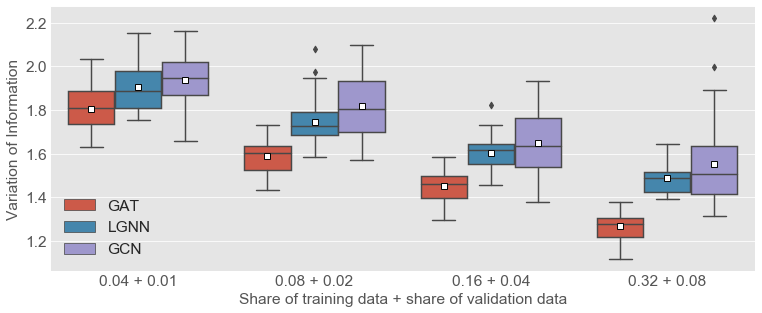

In [54]:
# Draw Plot
plt.figure(figsize=(13,5), dpi= 70)
plt.style.use('ggplot')
sns.boxplot(x='split_percentage_train', y='Variation of Information_Test', data=df, hue='net',showmeans=True,  meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
axes = plt.gca()
axes.set_xticklabels(["0.04 + 0.01","0.08 + 0.02","0.16 + 0.04","0.32 + 0.08"])
axes.set_xlabel("Share of training data + share of validation data", fontsize=16)
axes.set_ylabel("Variation of Information", fontsize=16)


# Decoration
#plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
leg = plt.legend()
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(axes.transAxes)

# Change to location of the legend. 
xOffset = 0
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = axes.transAxes)

plt.savefig('../summary/boxplots_vi.pdf',bbox_inches="tight")
plt.show()

In [46]:
df.loc[df["Rand-Index_Test"].idxmax()]

Unnamed: 0                                        181
name                                opti_keywords-349
save_logs                                        True
save_predictions                                 True
save_models                                      True
zip_models                                       True
verbatim                                        False
permutation                                         6
repetition                                          2
learning_rate                                    0.01
weight_decay                                     0.01
net                                      GAT_Net_fast
feature                                      keywords
skip                                            False
datetime                          2020-01-19 21:13:08
split_percentage_train                           0.32
split_percentage_val                             0.08
split_percentage_test                             0.6
loss_function_type          

In [5]:
loss = pd.read_csv("../summary/compare_loss_results.csv")


,Unnamed: 0,name,save_logs,save_predictions,save_models,zip_models,verbatim,permutation,repetition,learning_rate,...,Variation of Information_All,Rand-Index_Train,Mutual Information_Train,Variation of Information_Train,Rand-Index_Val,Mutual Information_Val,Variation of Information_Val,Rand-Index_Test,Mutual Information_Test,Variation of Information_Test
0,0,compare_loss-13,True,True,False,False,False,4,1,0.01,...,1.137328,0.866459,0.853543,0.513480,0.700915,0.700243,1.032584,0.658167,0.614816,1.381184
1,1,compare_loss-33,True,True,False,False,False,9,1,0.01,...,1.242869,0.837946,0.803470,0.711426,0.635081,0.642987,1.206051,0.624166,0.594890,1.452310
2,2,compare_loss-38,True,True,False,False,False,10,1,0.01,...,1.048852,0.996536,0.996055,0.014247,0.618693,0.665065,1.181093,0.656027,0.616015,1.395114
3,3,compare_loss-25,True,True,False,False,False,7,1,0.01,...,1.207324,0.875205,0.873625,0.440588,0.693962,0.637164,1.208213,0.620628,0.584587,1.482519
4,4,compare_loss-18,True,True,False,False,False,5,1,0.01,...,0.962867,0.982282,0.977339,0.082745,0.777472,0.734255,0.916553,0.685668,0.648149,1.282460


In [17]:
pd.options.display.max_columns = None
loss.head(10)

,Unnamed: 0,name,save_logs,save_predictions,save_models,zip_models,verbatim,permutation,repetition,learning_rate,weight_decay,net,feature,skip,datetime,split_percentage_train,split_percentage_val,split_percentage_test,loss_function_type,loss_function_nclasses,early_stopping_min,early_stopping_wait,hidden_size,hidden_layers,num_heads,dropout,batchnorm,residual,in_feats,out_feats,Rand-Index_All,Mutual Information_All,Variation of Information_All,Rand-Index_Train,Mutual Information_Train,Variation of Information_Train,Rand-Index_Val,Mutual Information_Val,Variation of Information_Val,Rand-Index_Test,Mutual Information_Test,Variation of Information_Test
0,0,compare_loss-13,True,True,False,False,False,4,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 16:46:54,0.32,0.08,0.6,inv,6,100,80,50,2,1,0.2,True,True,1433,7,0.726393,0.682714,1.137328,0.866459,0.853543,0.513480,0.700915,0.700243,1.032584,0.658167,0.614816,1.381184
1,1,compare_loss-33,True,True,False,False,False,9,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 17:14:05,0.32,0.08,0.6,inv,6,100,80,50,2,1,0.2,True,True,1433,7,0.690030,0.656039,1.242869,0.837946,0.803470,0.711426,0.635081,0.642987,1.206051,0.624166,0.594890,1.452310
2,2,compare_loss-38,True,True,False,False,False,10,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 17:23:08,0.32,0.08,0.6,inv,7,100,80,50,2,1,0.2,True,True,1433,7,0.753640,0.712999,1.048852,0.996536,0.996055,0.014247,0.618693,0.665065,1.181093,0.656027,0.616015,1.395114
3,3,compare_loss-25,True,True,False,False,False,7,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 17:05:40,0.32,0.08,0.6,inv,6,100,80,50,2,1,0.2,True,True,1433,7,0.701803,0.660844,1.207324,0.875205,0.873625,0.440588,0.693962,0.637164,1.208213,0.620628,0.584587,1.482519
4,4,compare_loss-18,True,True,False,False,False,5,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 16:59:09,0.32,0.08,0.6,inv,7,100,80,50,2,1,0.2,True,True,1433,7,0.780125,0.737227,0.962867,0.982282,0.977339,0.082745,0.777472,0.734255,0.916553,0.685668,0.648149,1.282460
5,5,compare_loss-7,True,True,False,False,False,2,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 16:37:05,0.32,0.08,0.6,nll,all,100,80,50,2,1,0.2,True,True,1433,7,0.769702,0.733707,0.974750,0.965535,0.956797,0.155704,0.691553,0.645497,1.240048,0.682294,0.660089,1.243387
6,6,compare_loss-21,True,True,False,False,False,6,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 16:59:22,0.32,0.08,0.6,inv,6,100,80,50,2,1,0.2,True,True,1433,7,0.727379,0.670272,1.177597,0.917397,0.889429,0.386458,0.672324,0.629727,1.254591,0.641691,0.592543,1.460801
7,7,compare_loss-4,True,True,False,False,False,2,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 16:34:58,0.32,0.08,0.6,inv,5,100,80,50,2,1,0.2,True,True,1433,7,0.569087,0.526550,1.585315,0.678257,0.659723,1.113197,0.530415,0.474813,1.681531,0.517224,0.481214,1.740235
8,8,compare_loss-34,True,True,False,False,False,9,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 17:19:29,0.32,0.08,0.6,inv,7,100,80,50,2,1,0.2,True,True,1433,7,0.783619,0.742400,0.938834,0.970411,0.964692,0.128214,0.722572,0.707392,0.997520,0.701948,0.661572,1.228013
9,9,compare_loss-11,True,True,False,False,False,3,1,0.01,0,GAT_Net_fast,keywords,False,2020-01-19 16:41:42,0.32,0.08,0.6,nll,all,100,80,50,2,1,0.2,True,True,1433,7,0.768988,0.731984,0.978890,0.994429,0.992431,0.027381,0.709117,0.726451,0.970155,0.672291,0.636150,1.319495


# Loss function

In [56]:
loss.groupby(["loss_function_type","loss_function_nclasses"])["Rand-Index_Test"].mean()

loss_function_type  loss_function_nclasses
inv                 5                         0.533714
                    6                         0.628045
                    7                         0.684369
nll                 all                       0.684749
Name: Rand-Index_Test, dtype: float64

In [55]:
loss.groupby(["loss_function_type","loss_function_nclasses"])["Rand-Index_Test"].std()

loss_function_type  loss_function_nclasses
inv                 5                         0.033607
                    6                         0.019482
                    7                         0.020350
nll                 all                       0.015895
Name: Rand-Index_Test, dtype: float64

In [27]:
loss = loss.sort_values(by=["loss_function_type","loss_function_nclasses"])

In [31]:
loss[["permutation","loss_function_type","loss_function_nclasses","Rand-Index_Test"]]

,permutation,loss_function_type,loss_function_nclasses,Rand-Index_Test
7,2,inv,5,0.517224
14,5,inv,5,0.539318
17,9,inv,5,0.584899
19,7,inv,5,0.536585
26,3,inv,5,0.551230
27,4,inv,5,0.453379
30,1,inv,5,0.536239
33,6,inv,5,0.554955
36,8,inv,5,0.529808
39,10,inv,5,0.533503


In [8]:
loss.columns

Index(['Unnamed: 0', 'name', 'save_logs', 'save_predictions', 'save_models',
       'zip_models', 'verbatim', 'permutation', 'repetition', 'learning_rate',
       'weight_decay', 'net', 'feature', 'skip', 'datetime',
       'split_percentage_train', 'split_percentage_val',
       'split_percentage_test', 'loss_function_type', 'loss_function_nclasses',
       'early_stopping_min', 'early_stopping_wait', 'hidden_size',
       'hidden_layers', 'num_heads', 'dropout', 'batchnorm', 'residual',
       'in_feats', 'out_feats', 'Rand-Index_All ', 'Mutual Information_All ',
       'Variation of Information_All ', 'Rand-Index_Train',
       'Mutual Information_Train', 'Variation of Information_Train',
       'Rand-Index_Val', 'Mutual Information_Val',
       'Variation of Information_Val', 'Rand-Index_Test',
       'Mutual Information_Test', 'Variation of Information_Test'],
      dtype='object')

# Epoch Development

In [2]:
df = pd.read_csv("../logs/opti_keywords-349.csv")

In [4]:
df

,epoch,epoch_best,dur,loss,rand_train,rand_val,rand_val_best,rand_test
0,0,0,1.032962,3.329542,0.027859,0.030385,0.030385,0.034850
1,1,1,0.960613,1.589103,0.257829,0.227425,0.227425,0.220959
2,2,2,0.787475,0.998189,0.447033,0.373824,0.373824,0.382965
3,3,3,1.000330,0.874429,0.538588,0.563970,0.563970,0.524780
4,4,4,1.285352,0.766789,0.589483,0.603171,0.603171,0.520539
...,...,...,...,...,...,...,...,...
146,146,19,0.227471,0.179230,0.899063,0.668868,0.726348,0.635801
147,147,19,0.228545,0.185991,0.879942,0.613752,0.726348,0.641001
148,148,19,0.223310,0.170112,0.880535,0.653087,0.726348,0.663341
149,149,19,0.204387,0.176029,0.886797,0.626577,0.726348,0.641561


In [52]:
df["rand_test"].max()

0.7013859998909703

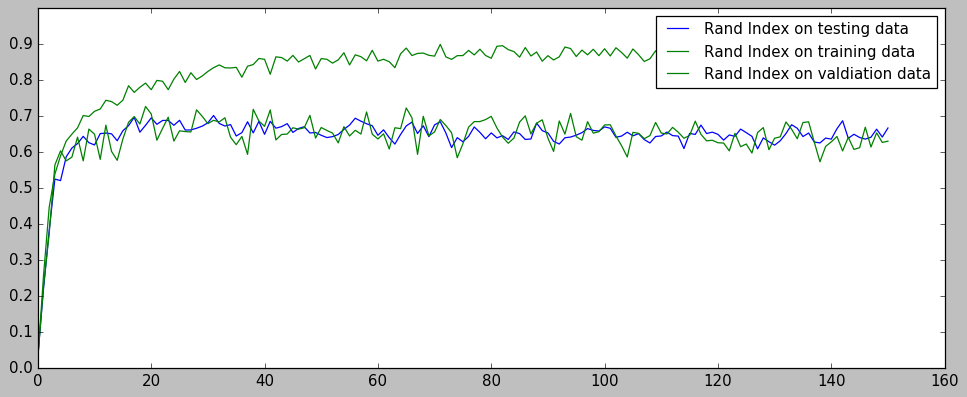

In [136]:

fig = plt.figure(figsize=(13,5), dpi= 90)
ax = plt.axes()

plt.style.use('classic')


ax.plot(list(df["epoch"]), list(df["rand_test"]), label = "Rand Index on testing data")
ax.plot(list(df["epoch"]), list(df["rand_train"]), label = "Rand Index on training data")
ax.plot(list(df["epoch"]), list(df["rand_val"]), label = "Rand Index on valdiation data", color = "green")

plt.yticks(np.arange(0, 1, 0.1)) 


ax.legend(fontsize=12)


C:\Nospace\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


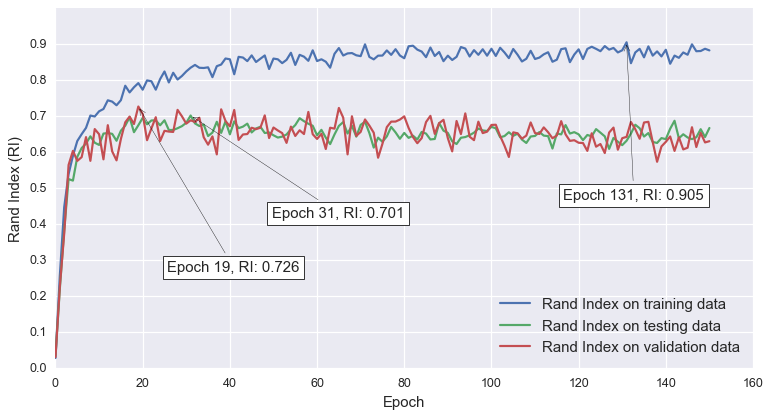

In [164]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(10,5), dpi= 90)

ax.plot(list(df["epoch"]), list(df["rand_train"]), label = "Rand Index on training data")
ax.plot(list(df["epoch"]), list(df["rand_test"]), label = "Rand Index on testing data")
ax.plot(list(df["epoch"]), list(df["rand_val"]), label = "Rand Index on validation data")
ax.legend(fontsize=12, loc= 4)

def annot_max(x,y,locx, locy, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.62)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(locx,locy), **kw)
    
def annot_max2(x,y,locx, locy, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Epoch {}, RI: {:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.62)
    arrowprops=dict(arrowstyle="->")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(locx,locy), **kw)

plt.yticks(np.arange(0, 1, 0.1)) 

annot_max2(list(df["epoch"]), df["rand_train"],0.93,0.5)
annot_max2(list(df["epoch"]), df["rand_test"],0.5,0.45)
annot_max2(list(df["epoch"]), df["rand_val"],0.35,0.3)

ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Rand Index (RI)", fontsize=12)

plt.savefig('../summary/rand_index_dev.pdf',bbox_inches="tight")
plt.show()

# Correlation of performance measures

In [165]:
df = pd.read_csv("../summary/opti_keywords_results.csv")

In [166]:
df[["Rand-Index_Test", "Mutual Information_Test", "Variation of Information_Test"]].corr()

,Rand-Index_Test,Mutual Information_Test,Variation of Information_Test
Rand-Index_Test,1.000000,0.973038,-0.901601
Mutual Information_Test,0.973038,1.000000,-0.929005
Variation of Information_Test,-0.901601,-0.929005,1.000000
